In [64]:
%matplotlib inline
import datetime

In [3]:
dt = datetime.datetime(year=2017,month=11,day=24,hour=10,minute=30)
dt

datetime.datetime(2017, 11, 24, 10, 30)

In [4]:
print (dt)

2017-11-24 10:30:00


In [5]:
import pandas as pd
ts = pd.Timestamp('2017-11-24') # 时间戳
ts

Timestamp('2017-11-24 00:00:00')

In [6]:
ts.month

11

In [7]:
ts.day

24

In [9]:
ts + pd.Timedelta('5 days') # 时间戳加5天

Timestamp('2017-11-29 00:00:00')

In [10]:
pd.to_datetime('2017-11-24') # 转换为时间戳

Timestamp('2017-11-24 00:00:00')

In [20]:
pd.to_datetime('24/11/2017', dayfirst=True) #日期在前 or 月在前

Timestamp('2017-11-24 00:00:00')

In [21]:
s = pd.Series(['2017-11-24 00:00:00','2017-11-25 00:00:00','2017-11-26 00:00:00']) # 时间序列
s

0    2017-11-24 00:00:00
1    2017-11-25 00:00:00
2    2017-11-26 00:00:00
dtype: object

In [22]:
ts = pd.to_datetime(s) # 转换为时间戳
ts

0   2017-11-24
1   2017-11-25
2   2017-11-26
dtype: datetime64[ns]

In [23]:
ts.dt.hour # 时间戳的小时

0    0
1    0
2    0
dtype: int32

In [24]:
ts.dt.weekday # 星期几

0    4
1    5
2    6
dtype: int32

In [27]:
pd.Series(pd.date_range(start='2017-11-24', periods=10, freq='12h')) 

0   2017-11-24 00:00:00
1   2017-11-24 12:00:00
2   2017-11-25 00:00:00
3   2017-11-25 12:00:00
4   2017-11-26 00:00:00
5   2017-11-26 12:00:00
6   2017-11-27 00:00:00
7   2017-11-27 12:00:00
8   2017-11-28 00:00:00
9   2017-11-28 12:00:00
dtype: datetime64[ns]

In [28]:
data = pd.read_csv('./data/flowdata.csv')
data.head()

,Time,L06_347,LS06_347,LS06_348
0,2009-01-01 00:00:00,0.137417,0.097500,0.016833
1,2009-01-01 03:00:00,0.131250,0.088833,0.016417
2,2009-01-01 06:00:00,0.113500,0.091250,0.016750
3,2009-01-01 09:00:00,0.135750,0.091500,0.016250
4,2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [29]:
data['Time'] = pd.to_datetime(data['Time'])
data = data.set_index('Time')
data

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [30]:
data.index

DatetimeIndex(['2009-01-01 00:00:00', '2009-01-01 03:00:00',
               '2009-01-01 06:00:00', '2009-01-01 09:00:00',
               '2009-01-01 12:00:00', '2009-01-01 15:00:00',
               '2009-01-01 18:00:00', '2009-01-01 21:00:00',
               '2009-01-02 00:00:00', '2009-01-02 03:00:00',
               ...
               '2012-12-31 21:00:00', '2013-01-01 00:00:00',
               '2013-01-01 03:00:00', '2013-01-01 06:00:00',
               '2013-01-01 09:00:00', '2013-01-01 12:00:00',
               '2013-01-01 15:00:00', '2013-01-01 18:00:00',
               '2013-01-01 21:00:00', '2013-01-02 00:00:00'],
              dtype='datetime64[ns]', name='Time', length=11697, freq=None)

In [32]:
# 一步到位# 读取时直接转换为时间戳 并设置为索引
data = pd.read_csv('./data/flowdata.csv', index_col=0, parse_dates=True) # parse_dates=True 会自动转换为时间戳

data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [33]:
# 选择某个时间段的数据 
data[pd.Timestamp('2012-01-01 09:00'):pd.Timestamp('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


In [34]:
# 选择某个时间段的数据
data[('2012-01-01 09:00'):('2012-01-01 19:00')]

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
2012-01-01 15:00:00,0.301417,0.287750,0.031417
2012-01-01 18:00:00,0.322083,0.304167,0.038083


In [35]:
data.tail(10)

,L06_347,LS06_347,LS06_348
Time,,,
2012-12-31 21:00:00,0.846500,0.846500,0.170167
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167


In [37]:
data.loc['2013']


,L06_347,LS06_347,LS06_348
Time,,,
2013-01-01 00:00:00,1.688333,1.688333,0.207333
2013-01-01 03:00:00,2.693333,2.693333,0.201500
2013-01-01 06:00:00,2.220833,2.220833,0.166917
2013-01-01 09:00:00,2.055000,2.055000,0.175667
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083
2013-01-01 21:00:00,0.898250,0.898250,0.077167
2013-01-02 00:00:00,0.860000,0.860000,0.075000


In [38]:
data['2012-01':'2012-03']

,L06_347,LS06_347,LS06_348
Time,,,
2012-01-01 00:00:00,0.307167,0.273917,0.028000
2012-01-01 03:00:00,0.302917,0.270833,0.030583
2012-01-01 06:00:00,0.331500,0.284750,0.030917
2012-01-01 09:00:00,0.330750,0.293583,0.029750
2012-01-01 12:00:00,0.295000,0.285167,0.031750
...,...,...,...
2012-03-31 09:00:00,0.104917,0.125000,0.012417
2012-03-31 12:00:00,0.098333,0.124417,0.011833
2012-03-31 15:00:00,0.091917,0.123917,0.011500


In [39]:
data[data.index.month == 1]

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
...,...,...,...
2013-01-01 12:00:00,1.710000,1.710000,0.129583
2013-01-01 15:00:00,1.420000,1.420000,0.096333
2013-01-01 18:00:00,1.178583,1.178583,0.083083


In [40]:
data[(data.index.hour > 8) & (data.index.hour <12)] # 选择某个时间段的数据

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
2009-01-04 09:00:00,0.109000,0.105167,0.018000
2009-01-05 09:00:00,0.161500,0.114583,0.021583
...,...,...,...
2012-12-28 09:00:00,0.961500,0.961500,0.092417
2012-12-29 09:00:00,0.786833,0.786833,0.077000
2012-12-30 09:00:00,0.916000,0.916000,0.101583


In [41]:
data.between_time('08:00','12:00') # 选择某个时间段的数据， between_time, 这里包含了12:00

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000
2009-01-02 09:00:00,0.141917,0.097083,0.016417
2009-01-02 12:00:00,0.147833,0.101917,0.016417
2009-01-03 09:00:00,0.124583,0.084417,0.015833
...,...,...,...
2012-12-30 12:00:00,1.465000,1.465000,0.086833
2012-12-31 09:00:00,0.682750,0.682750,0.066583
2012-12-31 12:00:00,0.651250,0.651250,0.063833


In [42]:
data.head()

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01 00:00:00,0.137417,0.097500,0.016833
2009-01-01 03:00:00,0.131250,0.088833,0.016417
2009-01-01 06:00:00,0.113500,0.091250,0.016750
2009-01-01 09:00:00,0.135750,0.091500,0.016250
2009-01-01 12:00:00,0.140917,0.096167,0.017000


In [43]:
data.resample('D').mean().head() # 按天重采样 并求均值
# 重采样主要是用于时间序列的频率转换，比如高频数据转换为低频数据，或者低频数据转换为高频数据

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.125010,0.092281,0.016635
2009-01-02,0.124146,0.095781,0.016406
2009-01-03,0.113562,0.085542,0.016094
2009-01-04,0.140198,0.102708,0.017323
2009-01-05,0.128812,0.104490,0.018167


In [46]:
data.resample('D').max().head() # 按天重采样 并求最大值

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.140917,0.097500,0.017583
2009-01-02,0.147833,0.101917,0.016833
2009-01-03,0.135833,0.092500,0.016833
2009-01-04,0.160417,0.113750,0.018417
2009-01-05,0.161500,0.115167,0.021583


In [47]:
data.resample('3D').mean().head() # 按3天重采样 并求均值

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-01,0.120906,0.091201,0.016378
2009-01-04,0.121594,0.091708,0.016670
2009-01-07,0.097042,0.070740,0.014479
2009-01-10,0.115941,0.086340,0.014545
2009-01-13,0.346962,0.364549,0.034198


In [59]:
data.resample('ME').mean().head() # 按月重采样 并求均值

,L06_347,LS06_347,LS06_348
Time,,,
2009-01-31,0.517864,0.536660,0.045597
2009-02-28,0.516847,0.529987,0.047238
2009-03-31,0.373157,0.383172,0.037508
2009-04-30,0.163182,0.129354,0.021356
2009-05-31,0.178588,0.160616,0.020744


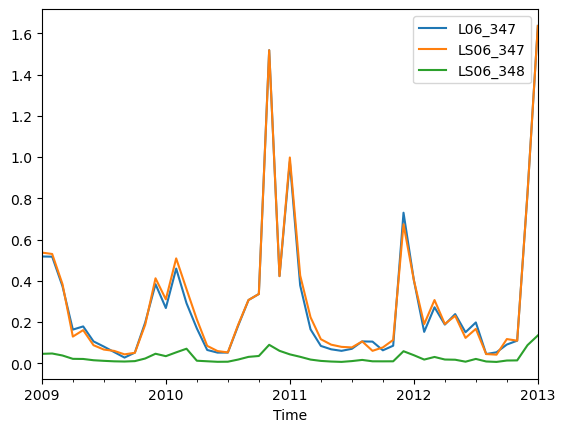

In [65]:
import matplotlib.pyplot as plt

data.resample('ME').mean().plot()
plt.show()
